In [1]:
import pandas as pd

# Cargar el archivo original
df_venta = pd.read_csv("C:/Users/pablo/proyecto/comparador/venta_unificado_final.csv")

# Crear diccionario para renombrar columnas
nuevos_nombres = {
    col: col.replace('es_', '').replace('_num', '') 
    for col in df_venta.columns 
    if col.startswith('es_') or col.endswith('_num')
}

# Renombrar columnas
df_venta.rename(columns=nuevos_nombres, inplace=True)

# Eliminar la columna 'timestamp'
df_venta.drop(columns=['timestamp'], inplace=True)

# Guardar archivo limpio intermedio (opcional)
df_venta.to_csv("C:/Users/pablo/proyecto/comparador/venta_limpio_renombrado.csv", index=False)

# Verificar columnas finales
print(df_venta.columns.tolist())


['titulo', 'ubicacion', 'link', 'descripcion_ampliada', 'certificado_energetico', 'tipo_vivienda', 'precio', 'habitacionnum', 'baños', 'superficie_construida', 'superficie_util', 'metros', 'lat', 'lon', 'piso', 'casa', 'atico', 'estudio', 'apartamento', 'duplex', 'chalet', 'finca', 'loft', 'conservacion', 'precio_m2']


In [3]:
import pandas as pd

# Cargar archivo limpio y renombrado si aún no lo tienes cargado
df_venta = pd.read_csv("C:/Users/pablo/proyecto/comparador/venta_limpio_renombrado.csv")

# Paso 1: Eliminar filas con precio_m2 nulo
df_venta = df_venta.dropna(subset=['precio_m2'])
print("Registros tras eliminar precio_m2 nulo:", df_venta.shape[0])

# Paso 2: Eliminar filas con conservacion nulo
df_venta = df_venta.dropna(subset=['conservacion'])
print("Registros tras eliminar conservacion nulo:", df_venta.shape[0])

# Paso 2.5 (extra): Convertir precio_m2 a número si no lo hiciste ya
df_venta['precio_m2'] = (
    df_venta['precio_m2']
    .astype(str)
    .str.replace('.', '', regex=False)
    .str.replace(' €/m²', '', regex=False)
    .str.strip()
)
df_venta['precio_m2'] = pd.to_numeric(df_venta['precio_m2'], errors='coerce')

# Paso 3: Eliminar outliers usando el método IQR
def eliminar_outliers_iqr(df, columnas):
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df

# Aplicar a columnas relevantes
columnas_outliers = ['precio', 'metros', 'precio_m2']
df_venta = eliminar_outliers_iqr(df_venta, columnas_outliers)
print("Registros tras eliminar outliers:", df_venta.shape[0])


Registros tras eliminar precio_m2 nulo: 971
Registros tras eliminar conservacion nulo: 669
Registros tras eliminar outliers: 517


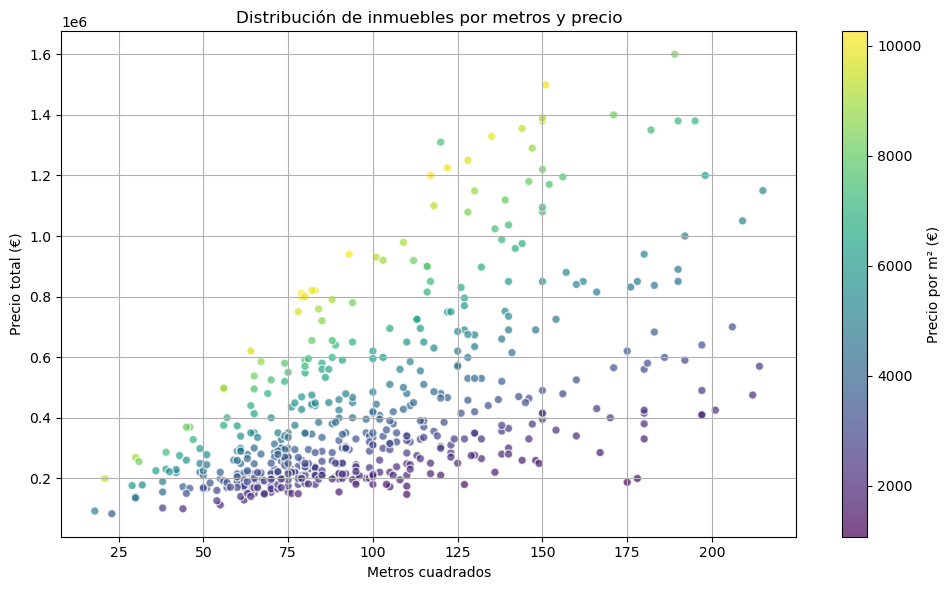

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_venta['metros'],
    df_venta['precio'],
    c=df_venta['precio_m2'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)

plt.colorbar(scatter, label='Precio por m² (€)')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio total (€)')
plt.title('Distribución de inmuebles por metros y precio')
plt.grid(True)
plt.tight_layout()
plt.show()



In [7]:
# Eliminar registros con menos de 25 metros cuadrados
df_venta = df_venta[df_venta['metros'] >= 25]

# Reiniciar índices (opcional, pero útil si vas a exportar después)
df_venta = df_venta.reset_index(drop=True)

# Ver cuántos registros quedan
print("✅ Registros tras eliminar inmuebles con < 25 m²:", df_venta.shape[0])



✅ Registros tras eliminar inmuebles con < 25 m²: 514


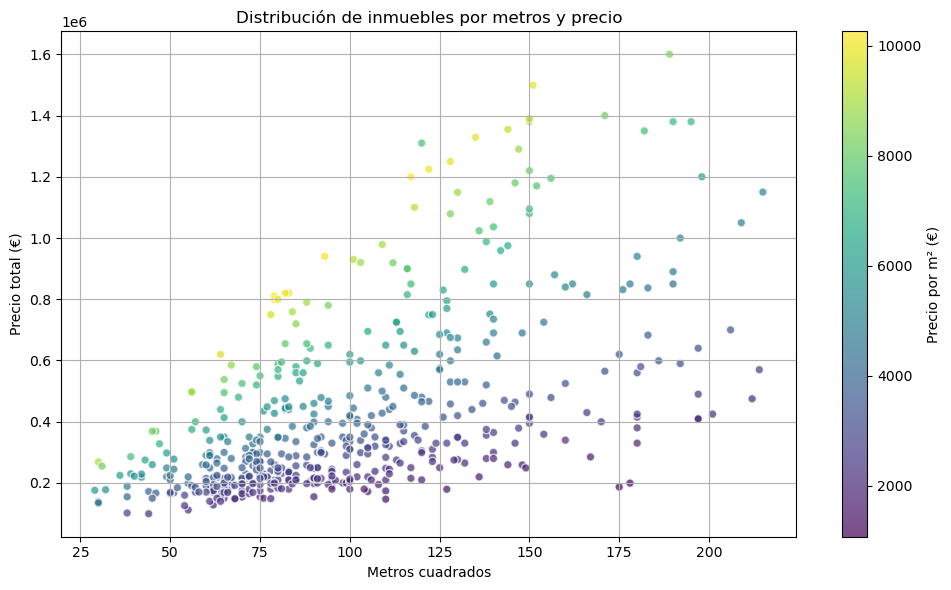

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_venta['metros'],
    df_venta['precio'],
    c=df_venta['precio_m2'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='w'
)

plt.colorbar(scatter, label='Precio por m² (€)')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio total (€)')
plt.title('Distribución de inmuebles por metros y precio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Eliminar columna 'certificado_energetico'
df_venta.drop(columns=['certificado_energetico'], inplace=True)

# Eliminar filas con nulos en columnas clave
df_venta = df_venta.dropna(subset=['ubicacion', 'descripcion_ampliada', 'superficie_construida'])

# Reiniciar índice tras limpieza
df_venta = df_venta.reset_index(drop=True)

# Confirmar resultado final
print("✅ Limpieza completa. Registros actuales:", df_venta.shape[0])
print("Columnas actuales:", df_venta.columns.tolist())


✅ Limpieza completa. Registros actuales: 513
Columnas actuales: ['titulo', 'ubicacion', 'link', 'descripcion_ampliada', 'tipo_vivienda', 'precio', 'habitacionnum', 'baños', 'superficie_construida', 'superficie_util', 'metros', 'lat', 'lon', 'piso', 'casa', 'atico', 'estudio', 'apartamento', 'duplex', 'chalet', 'finca', 'loft', 'conservacion', 'precio_m2']


In [17]:
# Guardar el archivo actualizado
df_venta.to_csv("C:/Users/pablo/proyecto/comparador/venta_limpio_final.csv", index=False)

# Verificación rápida
print("✅ Archivo guardado correctamente como venta_limpio_final.csv")



✅ Archivo guardado correctamente como venta_limpio_final.csv
